# Machine Learning Capstone Project Submission
# 1st Project

Link to approval of this project: https://review.udacity.com/#!/reviews/1083677

# Domain Background

This project is primarily keeping in mind the telecomm industry.  The time it takes to build new sites in any given city.  For the purposes of this project I will use 2 years (730 days) as a benchmark to complete the new site build after funding.  However, building new sites does not always happen within 2 years.

Not building in expected time frame has various implications.  The cost to build the sites presumably is higher if it takes longer because the cost of materials is expected to rise.  Secondly, the coverage or capacity need of the company is not met in time which hinders the company performance.  Ultimately, the wireless customers do not get to enjoy the benefits that the company want to provide because of the build delays.

I am interested in this project because once I have this model of machine learning build I can then apply this model to real world data from my company and use it to propose a change in the funding strategy.  

### Problem Statement

The problem is building a new site is taking lot longer than expected. Ideally, 2 years is the benchmark to build new sites for a telecomm industry. However, the reality is not all projects released to build in 2 years are build in time.  There are sites that will build before time and there are sites that will build after the delivery date.  The delay and acceleration of the project delivery has a financial impact.  The fundamental way of funding strategy needs to be changed by jurisdiction not by cycle times.  I want to identify by segmenting the customers which cluster should be given funding to begin the pre funding jurisdiction process. This approach will help ensure the New site is delivered on or before time. 

### Datasets and Inputs


I have used a randomly generated dataset of 579 samples with 10 milestones for every key. Using my core knowledge in this area I have created all possible situations that can occur.  Sometimes the situations or milestones are skewed because of database issues and sometimes the milestones are skewed because of the delay.   

Key – Key is a record created to represent a New Site Build
City – City 
County – County
State – State of build
Zip – Zip code
MS1 - Days to Vendor Handoff 
MS2 - Zoning Submitted
MS3 - Zoning Approved
MS4 - Candidate Identified
MS5 - Candidate Approved
MS6 - Site Acq /Jurisdiction Approved
MS7 - CX Start
MS8 - Tower Ready
MS9 - CX Complete
MS10 - ON AIR



# Steps to complete:
This project is similar to the customer segmenting project we did in the program.  I am going to use that as a model to help me walk through the steps of loading the data, exploring the data.  Looks for skewed performance and normalize it. Want to see the feature distribution and the data correlation between the different features (10 milestones).  If I find that the data is not normally distributed then I will apply feature scaling, using natural logarithm.  

Once at this step will try to find any outliers in the data.  (I suspect this is possible in real world data can be skewed because of database loading errors, transfers etc.)  I don’t want the noise so will remove those outliers.

After the data has been scaled to a more normal distribution and outliers removed, I can then apply PCA to understand which dimensions about the data best maximize the variance of the features involved.  Will report the explained variance by dimensions.

Next I would try to reduce the dimensionality if possible.

Lastly I want to create clusters. I will use Silhouette coefficient for data points measure.  I learned in the class that calculating the mean silhouette coefficient provides a simple scoring method of a clustering.  Then I can see the results of clustering and see how my samples line up.  I know that the ON AIR milestone above 700 should be classified differently then the ON AIR milestones below 700.  Given this knowledge I will be able to see if the algorithm helps predict the clusters accurately.



In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the DataSet
try:
    data = pd.read_csv("Data_clean_California.csv")
    data.drop(['ZIP','CITY','COUNTY','STATE','Key','MS1'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")
    

   
#data['MS1'] = data.MS1.astype(float)
data['MS2'] = data.MS2.astype(float)
data['MS3'] = data.MS3.astype(float)
data['MS4'] = data.MS4.astype(float)
data['MS5'] = data.MS5.astype(float)
data['MS6'] = data.MS6.astype(float)
data['MS7'] = data.MS7.astype(float)
data['MS8'] = data.MS8.astype(float)
data['MS9'] = data.MS9.astype(float)
data['MS10'] = data.MS10.astype(float)

data.describe()
data.head()


Wholesale customers dataset has 579 samples with 9 features each.


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
0,405.0,406.0,276.0,336.0,364.0,598.00,613.0,630.0,654.0
1,318.0,318.0,318.0,316.0,318.0,682.24,470.0,557.0,476.0
2,405.0,406.0,276.0,336.0,364.0,458.00,469.0,486.0,511.0
3,405.0,406.0,276.0,336.0,364.0,616.00,657.0,710.0,662.0
4,405.0,406.0,276.0,336.0,364.0,472.00,538.0,543.0,571.0


In [2]:

# TODO: Total number of records
n_records = len(data.index)
print (n_records)

# TODO: Number of records where ONAIR completed in 2 years 
ON_AIR = len(data[data['MS10']<=730].index)
print (ON_AIR)


# TODO: Number of records where ONAIR in 2 YR
ON_AIR_2YR = len(data[data['MS10']==700].index)
print (ON_AIR_2YR)

# TODO: Percentage of sites that completed in 2 YRS
greater_percent = 100 * ON_AIR / n_records
print ("{}%".format(greater_percent))


# Print the results
print("Total number of records: {}".format(n_records))
print("Number of builds in 2 years : {}".format(ON_AIR))
print("Number of builds completed exactly in 2 years: {}".format(ON_AIR_2YR))
print("Percentage of builds that completed in 2 years : {}%".format(greater_percent))

579
257
0
44%
Total number of records: 579
Number of builds in 2 years : 257
Number of builds completed exactly in 2 years: 0
Percentage of builds that completed in 2 years : 44%


#  Selecting Samples



In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [9,15,23]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples  dataset:")
display(samples)

Chosen samples  dataset:


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
0,551.0,791.0,143.0,233.0,885.0,892.0,962.0,1096.0,1035.0
1,405.0,406.0,276.0,336.0,364.0,610.0,641.0,696.0,661.0
2,601.0,629.0,438.0,454.0,794.0,808.0,878.0,937.0,989.0


BASE MODEL: Shuffle Split/ Naive Predictor Performance

In [4]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    data['MS10'], 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

# TODO: Calculate accuracy, precision and recall
accuracy = float(ON_AIR) / float(n_records)
precision = float(ON_AIR)/(float(ON_AIR) + float(ON_AIR_2YR))
recall = float(ON_AIR)/float(ON_AIR)


# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
#fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))
fscore = (1+(0.5)*(0.5))*((precision*recall)/((0.5*0.5*precision)+recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
print precision

Training set has 434 samples.
Testing set has 145 samples.
Naive Predictor: [Accuracy score: 0.4439, F-score: 1.0000]
1.0


/Users/vsutaria/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Feature Relevance
In this section we are going to check the milestone relevance.  Whether one of the milestones like MS6, time it takes to complete site acquisition is propotional. I am going to make that determination by using a supervised regression learner on this subset of the data with one feature removed and then score to see how well the model can predict.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['MS6'], axis=1, inplace = False)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['MS6'], test_size=0.25, random_state=1)


# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

print score                                             

                                                   

0.8378463022215654


Attempted to predict the MS6 milestone which is the time it takes to complete the site acquisition process.  The score is 83.46%. Since the score is high and closer to 1 tells me that other features correlate closerly with the site acquisition process MS6 milestone.  Likely this milestone will not be providing additional insights.  Although it is ok to drop this feature i want to keep it because i want to be included in the dimensioning step.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

To understand the dataset i created the scatter matrix of the 10 features to see the correlation between the features.

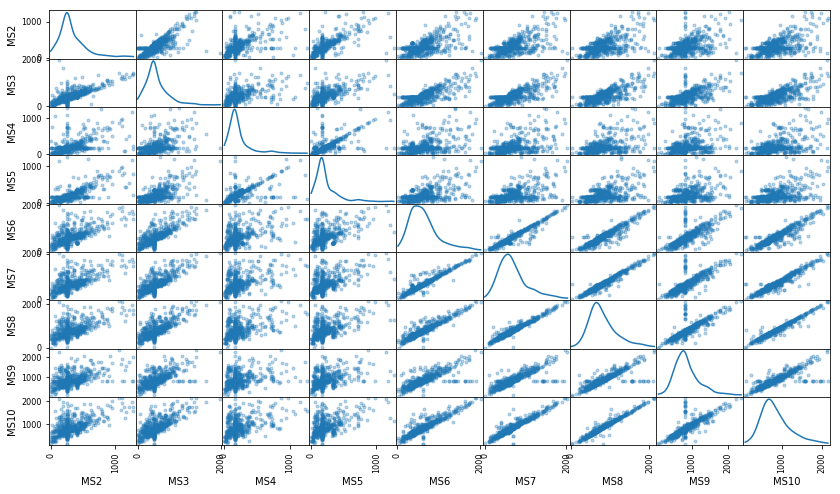

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');




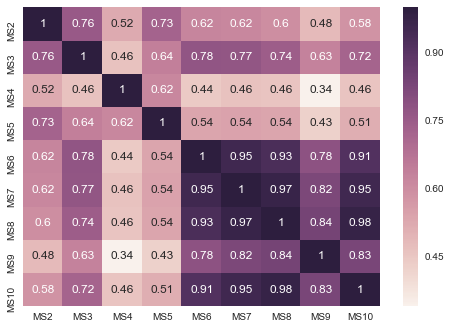

In [7]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

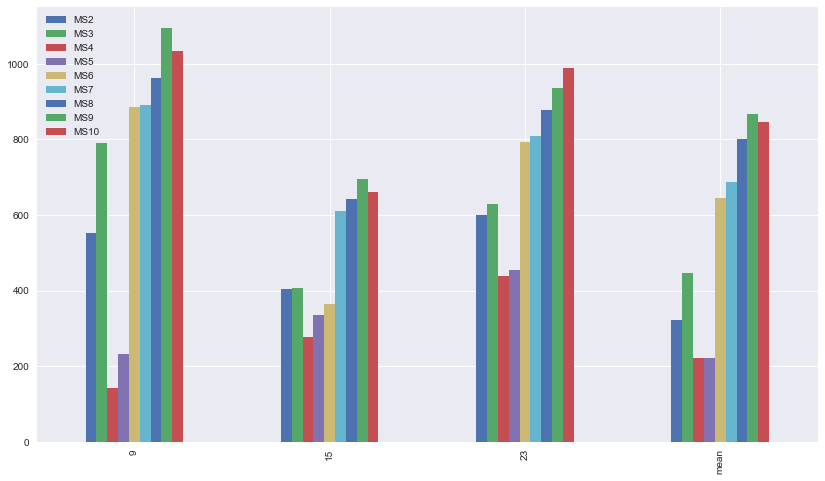

In [8]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns

# Get the means 
mean_data = data.describe().loc['mean', :]

# Append means to the samples' data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(14,8))

MS6 (Site Acq/Jurisdiction approval, MS7 (Construction Start) and MS8 (Tower Ready) seem to show a greater degree of correlation.  So anyone of these features could likely be dropped because they are not unique or valuable in helping me establish the profile of the data.  This is just an observation note.

# Data Preprocessing
Here i am preprocessing the data, performing scaling on the data, detecting and removing outliers.

Apply logarithmic scaling both data and samples.

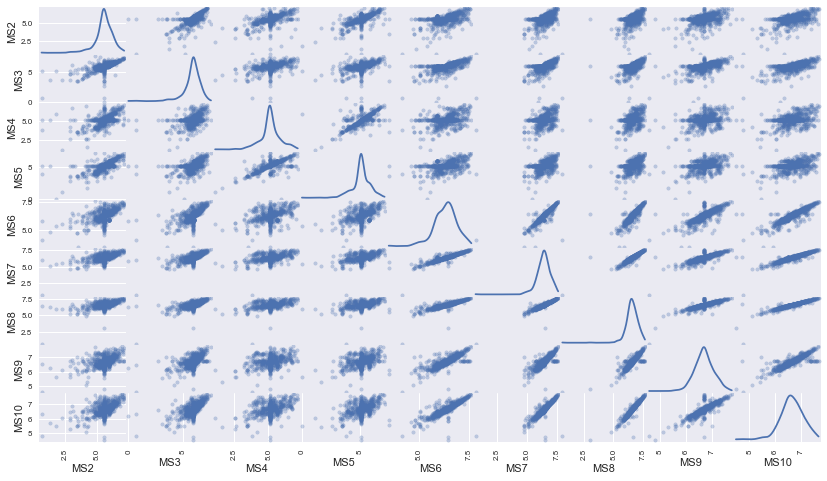

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)
# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

#Produce a scatter matrix for each pair of newly-transformed features

pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


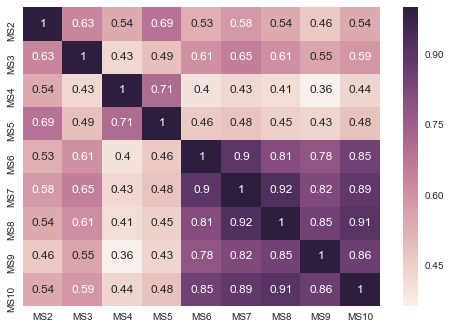

In [10]:
import seaborn as sns
sns.heatmap(log_data.corr(), annot=True)

Observations:

In [11]:
# Display the log-transformed sample data
display(log_samples)
#log_samples.replace([np.inf, -np.inf], np.nan)
#log_samples.dropna(axis=0, how='any')

#log_data.dropna(axis=0, how='any')

np.isnan(log_samples) # you get a boolean mask back with True for positions containing NaNs.

np.where(np.isnan(log_samples)) #you get back a tuple with i, j coordinates of NaNs.

np.nan_to_num(log_samples)
log_samples.replace([np.inf, -np.inf], 0)
np.nan_to_num(log_samples)
#log_samples.dropna(axis=0, how='any')
log_samples.shape



,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
0,6.311735,6.673298,4.962845,5.451038,6.785588,6.793466,6.869014,6.999422,6.942157
1,6.003887,6.006353,5.620401,5.817111,5.897154,6.413459,6.463029,6.545350,6.493754
2,6.398595,6.444131,6.082219,6.118097,6.677083,6.694562,6.777647,6.842683,6.896694


(3, 9)

# Identifying Outliers
I learned in the customer segment project that data preprocessing step of any analysis includes detecting and removing outliers.  I want to do the same here.  Here the outlier step is calculated as 1.5 times the interquartile range (IQR).  A datapoint with a feature that is beyond an outlier step outside of IQR for that feature is considered abnormal.

Below code i have assigned 25th percentile, 75th percentile , assinged calculation of an outlier step and removed the outliers from the dataset.

In [12]:
# List of all outliers
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print "Outlier step:", step
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    
    outliers += feature_outliers.index.tolist()
    
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "Number of outliers (inc duplicates): ", len(outliers)
print "New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape)


Outlier step: 0.9603794651113513
Data points considered outliers for the feature 'MS2':


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
83,0.693147,5.220356,5.080348,5.103032,5.860786,6.095825,6.347389,6.545350,6.347389
88,3.044522,6.165418,6.622736,5.103032,6.551080,6.551080,6.685861,6.809039,6.855409
100,4.060443,5.916202,5.080348,5.103032,6.335054,6.383507,6.526495,6.553933,6.677083
122,3.526361,3.526361,3.526361,3.526361,3.526361,4.779123,5.505332,5.826000,5.549076
134,4.219508,5.111988,5.080348,5.103032,6.511745,6.522093,6.803505,6.902743,6.820016
176,3.178054,4.828314,5.080348,5.103032,6.363028,6.371612,6.478510,6.618739,6.536692
182,4.343805,5.402677,5.080348,5.103032,6.173786,6.282267,6.388561,6.535241,6.587550
189,3.295837,5.327876,5.080348,5.103032,5.771441,5.863631,6.102559,6.282267,6.171701
194,4.143135,4.653960,3.465736,3.465736,5.379897,5.379897,5.814131,6.115892,5.948035
217,2.890372,4.682131,5.080348,5.103032,6.021023,6.033086,6.318968,6.398595,6.444131


Outlier step: 1.001341369023789
Data points considered outliers for the feature 'MS3':


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
13,5.553734,4.584967,6.684612,5.103032,6.410175,6.410175,6.685861,6.695799,6.711740
78,5.553734,0.693147,5.080348,5.103032,5.948035,5.993961,6.336826,6.466145,6.336826
87,4.430817,4.430817,4.430817,4.430817,5.609472,5.676754,5.877736,6.142037,5.908083
101,5.553734,3.433987,5.080348,5.103032,5.866468,5.998937,6.095825,6.139885,6.184149
103,5.553734,4.454347,5.080348,5.103032,5.641907,5.645447,5.899897,6.042633,6.238325
113,5.553734,4.094345,5.080348,5.103032,6.013715,6.033086,6.352629,6.483107,6.411818
122,3.526361,3.526361,3.526361,3.526361,3.526361,4.779123,5.505332,5.826000,5.549076
178,5.553734,2.708050,5.080348,5.103032,6.364751,6.366470,6.495266,6.733402,6.605298
194,4.143135,4.653960,3.465736,3.465736,5.379897,5.379897,5.814131,6.115892,5.948035
227,6.445720,4.430817,5.093750,5.103032,6.501290,6.582025,6.693324,6.715383,6.706862


Outlier step: 0.6813392126554016
Data points considered outliers for the feature 'MS4':


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
5,6.555357,6.602588,6.366470,6.366470,6.938284,6.963190,7.021084,7.038784,7.046647
13,5.553734,4.584967,6.684612,5.103032,6.410175,6.410175,6.685861,6.695799,6.711740
24,6.003887,6.194405,3.332205,4.553877,6.376727,6.381816,6.505784,6.624065,6.545350
52,5.204007,5.579730,4.290459,4.330733,5.888878,6.040255,6.261492,6.274762,6.287859
54,4.934474,5.659482,4.110874,4.189655,6.118097,6.177944,6.428105,6.527958,6.445720
63,6.261492,6.717805,6.582025,6.582025,6.996681,7.012115,7.067320,7.138867,7.110696
72,6.373320,6.476972,6.177944,6.177944,6.603944,6.682109,6.885510,6.992096,7.135687
79,6.492240,6.580639,6.352629,6.356108,6.677083,6.726233,6.838405,6.887553,6.851185
88,3.044522,6.165418,6.622736,5.103032,6.551080,6.551080,6.685861,6.809039,6.855409
108,6.812345,6.803505,6.582025,6.582025,6.516193,6.729824,6.922644,6.973543,6.857514


Outlier step: 0.8662512046187363
Data points considered outliers for the feature 'MS5':


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
12,5.553734,6.270988,5.080348,7.146772,6.762730,6.790097,7.146772,7.011214,7.010312
35,5.117994,5.446737,5.123964,3.891820,6.028279,6.104793,6.350886,6.357842,6.369901
56,4.787492,5.755742,5.123964,3.806662,6.150603,6.165418,6.410175,6.413459,6.461468
62,5.010635,5.176150,5.123964,3.806662,5.693732,5.771441,6.220590,6.248043,6.248043
63,6.261492,6.717805,6.582025,6.582025,6.996681,7.012115,7.067320,7.138867,7.110696
108,6.812345,6.803505,6.582025,6.582025,6.516193,6.729824,6.922644,6.973543,6.857514
121,4.804021,4.852030,5.123964,3.891820,5.693732,5.894403,6.111467,6.118097,6.122493
122,3.526361,3.526361,3.526361,3.526361,3.526361,4.779123,5.505332,5.826000,5.549076
194,4.143135,4.653960,3.465736,3.465736,5.379897,5.379897,5.814131,6.115892,5.948035
214,6.614726,6.628041,5.080348,6.633318,6.886532,6.937314,7.074117,7.090910,7.085901


Outlier step: 1.0650593268120336
Data points considered outliers for the feature 'MS6':


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
122,3.526361,3.526361,3.526361,3.526361,3.526361,4.779123,5.505332,5.826000,5.549076
198,5.553734,5.955449,5.080348,5.103032,4.804021,4.844187,5.420535,6.126869,5.905362
300,1.386294,3.737670,5.080348,5.103032,4.867534,5.147494,6.255750,6.244167,5.676754
303,3.465736,3.465736,3.465736,3.465736,4.744932,4.744932,5.273000,6.084499,5.459586
336,5.553734,5.955449,5.080348,5.103032,4.828314,5.262690,5.880533,5.950643,5.894403
345,4.174387,4.174387,4.158883,4.158883,4.727388,4.727388,4.828314,5.111988,5.093750
379,3.465736,3.465736,3.465736,3.465736,4.744932,4.744932,5.273000,7.003065,5.459586
482,5.553734,5.955449,5.080348,5.103032,4.624973,5.398163,5.652489,5.874931,5.749393
554,5.553734,5.955449,5.080348,5.103032,3.496508,5.659482,5.905362,6.113682,5.926926
565,0.693147,0.693147,3.784190,3.784190,4.143135,0.693147,0.693147,4.595120,4.779123


Outlier step: 0.949415727473764
Data points considered outliers for the feature 'MS7':


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
91,5.553734,5.955449,5.080348,5.103032,4.990433,5.049856,5.598422,5.774552,6.156979
122,3.526361,3.526361,3.526361,3.526361,3.526361,4.779123,5.505332,5.826000,5.549076
198,5.553734,5.955449,5.080348,5.103032,4.804021,4.844187,5.420535,6.126869,5.905362
248,5.553734,5.955449,5.080348,5.103032,4.983607,4.934474,5.556828,6.349139,6.066108
300,1.386294,3.737670,5.080348,5.103032,4.867534,5.147494,6.255750,6.244167,5.676754
303,3.465736,3.465736,3.465736,3.465736,4.744932,4.744932,5.273000,6.084499,5.459586
304,4.025352,4.564348,3.465736,3.465736,5.062595,5.062595,5.347108,6.084499,5.517453
345,4.174387,4.174387,4.158883,4.158883,4.727388,4.727388,4.828314,5.111988,5.093750
347,5.553734,5.955449,5.080348,5.103032,4.941642,5.049856,5.666427,5.857933,5.669881
379,3.465736,3.465736,3.465736,3.465736,4.744932,4.744932,5.273000,7.003065,5.459586


Outlier step: 0.8056123271526978
Data points considered outliers for the feature 'MS8':


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
122,3.526361,3.526361,3.526361,3.526361,3.526361,4.779123,5.505332,5.826000,5.549076
198,5.553734,5.955449,5.080348,5.103032,4.804021,4.844187,5.420535,6.126869,5.905362
303,3.465736,3.465736,3.465736,3.465736,4.744932,4.744932,5.273000,6.084499,5.459586
304,4.025352,4.564348,3.465736,3.465736,5.062595,5.062595,5.347108,6.084499,5.517453
345,4.174387,4.174387,4.158883,4.158883,4.727388,4.727388,4.828314,5.111988,5.093750
379,3.465736,3.465736,3.465736,3.465736,4.744932,4.744932,5.273000,7.003065,5.459586
380,4.025352,4.564348,3.465736,3.465736,5.062595,5.062595,5.347108,6.598509,5.655992
391,5.553734,5.955449,5.080348,5.103032,6.461015,6.525382,3.044522,4.836282,4.488636
392,5.553734,3.091042,5.080348,5.103032,4.997212,5.049856,5.480639,5.590987,5.602119
479,2.944439,3.713572,2.564949,2.833213,5.187386,4.709530,5.257495,5.602119,5.303305


Outlier step: 0.6982892496022837
Data points considered outliers for the feature 'MS9':


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
313,1.791759,5.117994,5.921578,0.000000,5.420535,5.411646,5.921578,5.598422,5.468060
345,4.174387,4.174387,4.158883,4.158883,4.727388,4.727388,4.828314,5.111988,5.093750
391,5.553734,5.955449,5.080348,5.103032,6.461015,6.525382,3.044522,4.836282,4.488636
392,5.553734,3.091042,5.080348,5.103032,4.997212,5.049856,5.480639,5.590987,5.602119
396,4.912655,7.596392,5.080348,7.045777,7.612337,7.612337,7.654917,7.705713,7.657755
479,2.944439,3.713572,2.564949,2.833213,5.187386,4.709530,5.257495,5.602119,5.303305
480,4.343805,4.762174,2.639057,2.564949,5.036953,5.147494,5.429346,5.605802,5.463832
488,6.957497,7.246368,6.766192,6.766192,7.537430,7.583248,7.660585,7.760467,7.668561
543,4.262680,4.488636,1.609438,1.609438,5.062595,5.105945,5.241747,5.318120,5.402677
565,0.693147,0.693147,3.784190,3.784190,4.143135,0.693147,0.693147,4.595120,4.779123


Outlier step: 0.8090177280149695
Data points considered outliers for the feature 'MS10':


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
122,3.526361,3.526361,3.526361,3.526361,3.526361,4.779123,5.505332,5.826000,5.549076
303,3.465736,3.465736,3.465736,3.465736,4.744932,4.744932,5.273000,6.084499,5.459586
304,4.025352,4.564348,3.465736,3.465736,5.062595,5.062595,5.347108,6.084499,5.517453
313,1.791759,5.117994,5.921578,0.000000,5.420535,5.411646,5.921578,5.598422,5.468060
345,4.174387,4.174387,4.158883,4.158883,4.727388,4.727388,4.828314,5.111988,5.093750
379,3.465736,3.465736,3.465736,3.465736,4.744932,4.744932,5.273000,7.003065,5.459586
391,5.553734,5.955449,5.080348,5.103032,6.461015,6.525382,3.044522,4.836282,4.488636
478,5.553734,5.955449,5.080348,5.103032,6.461015,6.525382,6.682347,6.702955,4.709530
479,2.944439,3.713572,2.564949,2.833213,5.187386,4.709530,5.257495,5.602119,5.303305
480,4.343805,4.762174,2.639057,2.564949,5.036953,5.147494,5.429346,5.605802,5.463832


Number of outliers (inc duplicates):  350
New dataset with removed outliers has 399 samples with 9 features each.


In [13]:
good_data.describe()


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,5.704421,6.020039,5.194389,5.272006,6.359908,6.429474,6.607920,6.720089,6.671754
std,0.404008,0.433972,0.371691,0.406151,0.431618,0.404398,0.339224,0.301823,0.328054
min,4.430817,4.718499,4.343805,4.158883,5.036953,5.170484,5.594711,5.846439,5.817111
25%,5.553734,5.869297,5.080348,5.103032,6.035479,6.186209,6.392754,6.505036,6.463809
50%,5.553734,5.978886,5.080348,5.103032,6.388561,6.426488,6.583409,6.702955,6.639876
75%,6.003887,6.326149,5.407172,5.564520,6.656726,6.692084,6.817283,6.913737,6.894670
max,6.782192,7.084226,6.124683,6.426488,7.466228,7.461066,7.547502,7.611348,7.576097


Debug steps can ignore.

In [14]:


#good_data.dtypes
#good_data['MS1'] = good_data.MS1.astype(float)
#good_data['MS2'] = good_data.MS2.astype(float)
#good_data['MS3'] = good_data.MS3.astype(float)
#good_data['MS4'] = good_data.MS4.astype(float)
#good_data['MS5'] = good_data.MS5.astype(float)
#good_data['MS6'] = good_data.MS6.astype(float)
#good_data['MS7'] = good_data.MS7.astype(float)
#good_data['MS8'] = good_data.MS8.astype(float)
#good_data['MS9'] = good_data.MS9.astype(float)
#good_data['MS10'] = good_data.MS10.astype(float)



#np.isnan(good_data).any()
#np.where(good_data.values >= np.finfo(np.float64).max)
#np.isfinite(good_data.all())
#Where x is my pandas Dataframe 
good_data.info()
good_data.shape

#good_data.replace([np.inf, -np.inf], np.nan)
#good_data.dropna(axis=1, how='all')
#good_data.dropna(axis=0, how='all')

#good_data.dtypes
#np.nan_to_num(good_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
MS2     399 non-null float64
MS3     399 non-null float64
MS4     399 non-null float64
MS5     399 non-null float64
MS6     399 non-null float64
MS7     399 non-null float64
MS8     399 non-null float64
MS9     399 non-null float64
MS10    399 non-null float64
dtypes: float64(9)
memory usage: 28.1 KB


(399, 9)

In [15]:
#np.isnan(good_data) # you get a boolean mask back with True for positions containing NaNs.

#np.where(np.isnan(good_data)) #you get back a tuple with i, j coordinates of NaNs.

#np.nan_to_num(good_data)

#import sys
#sys.float_info.max

#log_samples.info()

good_data.head()


,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
0,6.003887,6.006353,5.620401,5.817111,5.897154,6.393591,6.418365,6.445720,6.483107
1,5.762051,5.762051,5.762051,5.755742,5.762051,6.525382,6.152733,6.322565,6.165418
2,6.003887,6.006353,5.620401,5.817111,5.897154,6.126869,6.150603,6.186209,6.236370
3,6.003887,6.006353,5.620401,5.817111,5.897154,6.423247,6.487684,6.565265,6.495266
4,6.003887,6.006353,5.620401,5.817111,5.897154,6.156979,6.287859,6.297109,6.347389


In [16]:
#np.isnan(log_samples) # you get a boolean mask back with True for positions containing NaNs.

#np.where(np.isnan(log_samples)) #you get back a tuple with i, j coordinates of NaNs.

#np.nan_to_num(log_samples)

#import sys
#sys.float_info.max

log_samples.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
MS2     3 non-null float64
MS3     3 non-null float64
MS4     3 non-null float64
MS5     3 non-null float64
MS6     3 non-null float64
MS7     3 non-null float64
MS8     3 non-null float64
MS9     3 non-null float64
MS10    3 non-null float64
dtypes: float64(9)
memory usage: 288.0 bytes


# Feature Transformation

In this section i have used PCA, principal component analysis to draw conclusions about the underlying structure.  Since using the PCA on a dataset calculates the dimensions which best maximize variance, this will help find out which compound combinations of the features best describe the jurisdictions.

This section will help me understand which dimensions about the data best maximize the variance of featires involved.  

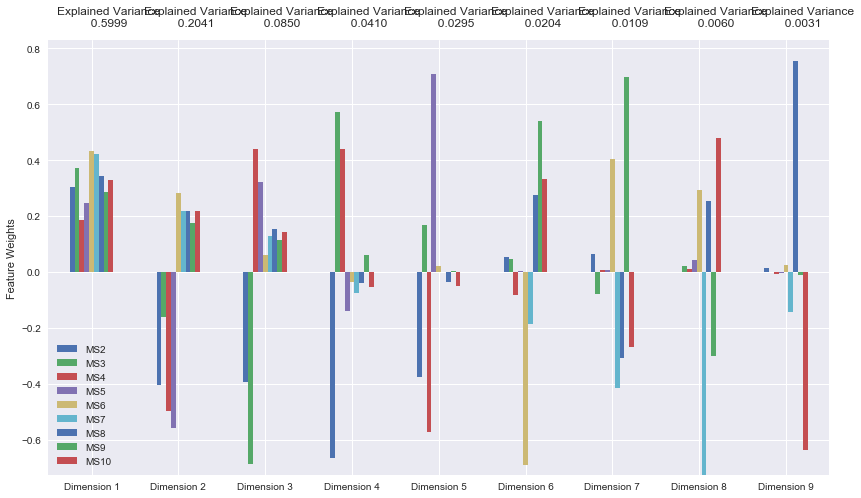

In [17]:
from sklearn.decomposition import PCA


# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data.values)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)




In [18]:
#good_data.shape
pca_samples.shape
#log_samples.shape
#pca_results.shape



(3, 9)

If i look at the 1st and 2nd component 59.99% + 20.41% = 80.40% of the variance is explained. 

If we look at the first 4 component 59.99% + 20.41%+ 8.50% +4.10% = 93.00% of the variance is explained.

https://onlinecourses.science.psu.edu/stat505/node/54 http://setosa.io/ev/principal-component-analysis/

Observations to see how the log transformed sample data has changed after having a PCA transformation applied to 10 dimensions.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9
0,1.0254,0.0308,-0.5473,-0.2061,0.1275,0.0329,0.0497,-0.0055,-0.0107
1,-0.0657,-0.8701,0.1571,-0.0723,0.0312,0.1122,-0.1831,-0.1665,-0.0035
2,1.1592,-1.0046,0.2249,0.0146,-0.1081,-0.0935,0.0135,0.0697,-0.0450


##Dimentionality Reduction:
So our goal for using PCA was to reduce the dimentionality of the data, which is in essence reducing the complexity of the problem.  I know that reducing the dimensions will mean that less of the total variance in the data is being explained.  This is why the cumulative explained variance ratio is important.  If we have significant amount of variance explained int he first 2 or 3 dimensions reduced data might be acceptable.  Since 80.40% of the variance is covered by the first 2 dimensions i decided to go 2.

In [20]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])



In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.0254,0.0308
1,-0.0657,-0.8701
2,1.1592,-1.0046


Visualizing a Biplot:

This is a scatterlot where each datapoint is represented by its scores with the Principal components.  The axes are the PC, here in this report it is the dimensions. The plot shows projects of the originial features along with the components.  This report helps discover relationships between the Principal components and the original features.

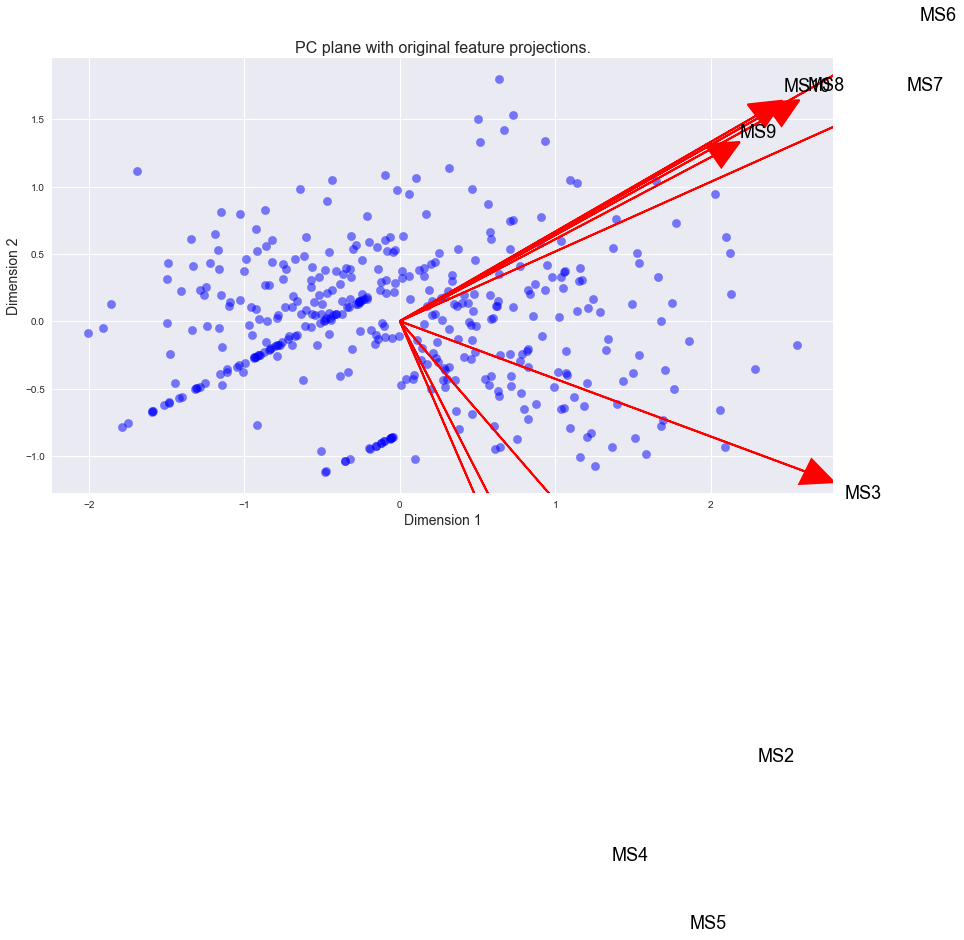

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

# Finally Clustering 
In this section i have used K-Means clustering algorithm to identify the various segments hidden in the data.  Then i recovered data points from the clusters tounderstand their significance by transforming them back into the original dimensions and scale.

I used K-Means because it is easy to implement with large number of variables.

Additionally to quantify the goodness of a clustering by calculating each data points i used Silhouette Coefficient.  The Silhouette Coefficient for a datapoint measures how similar it is to its assigned cluster from -1 (not similar) to 1 (similar).  Therefore, providing a mean silhouette coefficient provides simple scoring method of a given clustering.

In the code cell below i have fit the reduced_data and assigned them to preds.  Then found the cluster centers using the algorithm's attribute and assign them to centers.  Then predict the cluster for each sample data point in PCA_Samples and assign them to sample_preds.  Lastly calculate the silhouette score of the reduced_data preds.

In [23]:
# K-MEANS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=3, random_state=45).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(reduced_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')

print("KMeans score", score)

#silhouette_score for different clusters 

# 2 = 0.43258002255113626
# 3 = 0.33666175827871947
# 4 = 0.35746014747047655
# 6 = 0.36285833356406383
# 9 = 0.36788137744626376
# 10 = 0.3807522100340986


('KMeans score', 0.33666175827871947)


## 
Although 2 has the best Silhouette Score, i decided to choose 3 Clusters because I learned it took me further in my analysis

Visualizing the Clusters below:

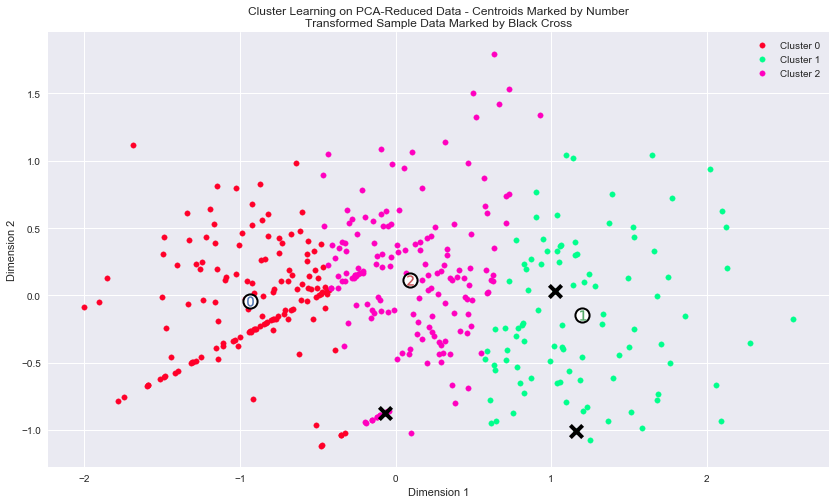

In [24]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

Data Recovery:
I learned this feature in the program.  Each cluster in the visualization has a central point.  These are centers/means but not specifically data points rather they are averages of all the datapoints in the clusters.  Since the data is reduced in dimension and scaled by a logarithm, we can recover the representative jurisdiction from these data points by applying the inverse transformations.

In [25]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,MS2,MS3,MS4,MS5,MS6,MS7,MS8,MS9,MS10
Segment 0,230.0,292.0,155.0,158.0,381.0,414.0,533.0,629.0,577.0
Segment 1,458.0,659.0,242.0,285.0,934.0,997.0,1084.0,1142.0,1134.0
Segment 2,295.0,419.0,173.0,187.0,623.0,662.0,786.0,870.0,836.0


## Now what does these 3 segments tell us?

Segment 0 cluster tells me that the site acq/jurisdiction approval and on air time is well below 730 days/2 years.  Perhaps these are candidates for consideration in reducing my delivery time.

Segment 1 cluster represent jurisdiction that will likely need to be considered for prefunding or increase in delivery time.  The MS6 (Jurisdictional Approval) and MS10 (ON AIR) is way above the 730 days/2 year mark.  

Segment 2 cluster tells me that we need not spend any time analyzing the strategy of funding on these.  These can be funded as BAU efforts as they will be build in 2 years /730 days or close to it.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 1)
('Sample point', 1, 'predicted to be in Cluster', 2)
('Sample point', 2, 'predicted to be in Cluster', 1)


So i took the sample points and ran it against the predictions.  I find that sample 0, ON AIR was 1035 days, the model accurately predicted this in cluster 1.  Sample 1 had an ON AIR of 661, which the model accurately predicted as BAU and sample 2 predicted cluster 1 which is also accurate because the ON AIR for it was 989 days this is well above 730 days and correctly classified under cluster 1, for review prefunding.

# Conclusion
This is my first Machine Learning project done on a real life problem.  I believe i have successfully developed a model that has classified the data in 3 clusters.  I tested my model via sample and it accurately predicts the correct cluster.

This information can be used to propose a change in funding strategy.  When i first started the model i only wanted to find jurisdictions that will require prefunding or increase delivery time to complete the New Site but during the training process i learned that i can actually use this model to suggest the inverse.  Meaning jurisdictions that predict to be in Segment 0, take less then 2 years to be build can be looked at to release funding with shorter interval time. 

My base model accuracy score is 44.33% only looking at the ON AIR MS10 milestones and a larger dataset.  My PCA model captures 93% of the variance after the outlier removals and gives a k means score of 43.25%.  I chose 3 clusters although the score is 33.66% because i feel the dataset is more richer.

In [30]:
# Display the clustering results based on 'Channel' data
#vs.MS1_results(reduced_data, outliers, pca_samples)

AttributeError: 'module' object has no attribute 'MS1_results'

In [36]:
def City_results(reduced_data, outliers, pca_samples):
#'''
#	Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
#	Data is labeled by "Channel" and cues added for student-selected sample data
#	'''

# Check that the dataset is loadable
    try:
        full_data = pd.read_csv("Data_Clean_California.csv")
    except:
        print("Dataset could not be loaded. Is the file missing?")       
        return False

In [ ]:
city_results.de